In [1]:
# !pip install pydotplus
# !pip install graphviz

In [2]:
# pip install graphviz - install using cmd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('iris.csv')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

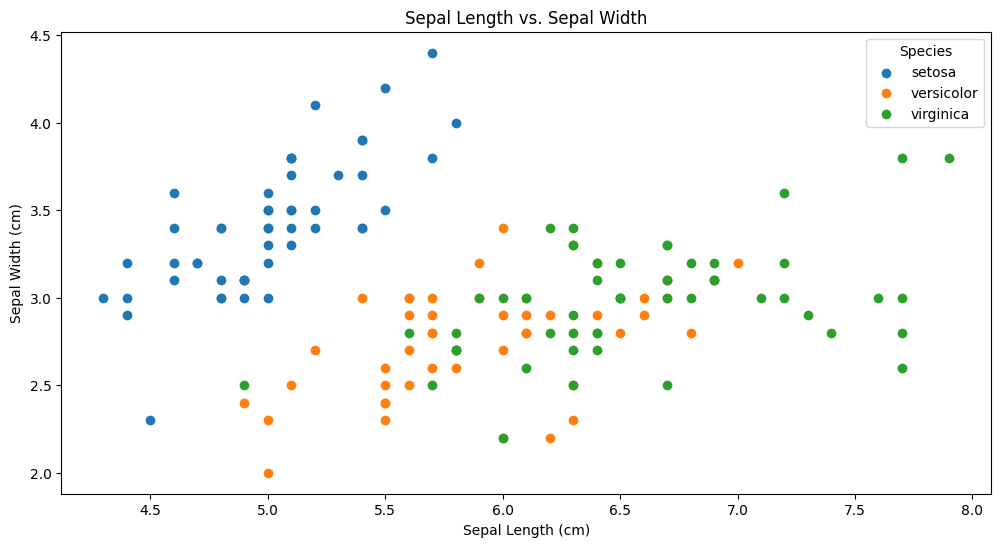

In [8]:
plt.figure(figsize=(12, 6))
for species, species_data in data.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

In [9]:
X = data.drop('species', axis=1)
y = data['species']

In [10]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

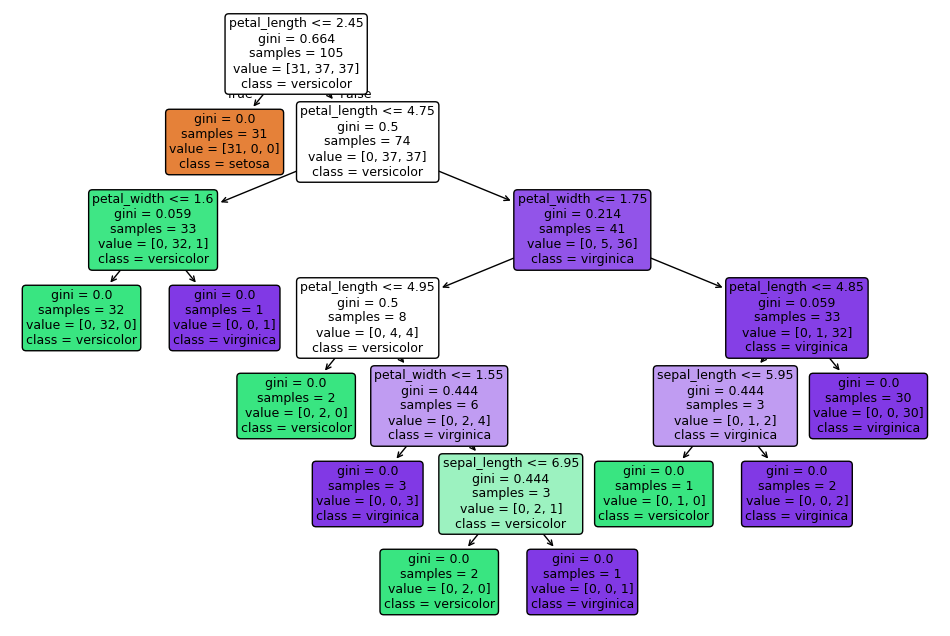

In [14]:
# # Visualize the decision tree
# dot_data = export_graphviz(
#     clf,
#     out_file=None,
#     feature_names=X.columns,
#     class_names=y.unique(),
#     filled=True,
#     rounded=True,
#     special_characters=True
# )

# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png("iris_decision_tree.png")

plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=y.unique(), 
          filled=True, 
          rounded=True)
plt.savefig("iris_decision_tree.png")  # Change the filename and format as needed
# plt.show()



In [15]:
y_pred = clf.predict(X_test)

In [16]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


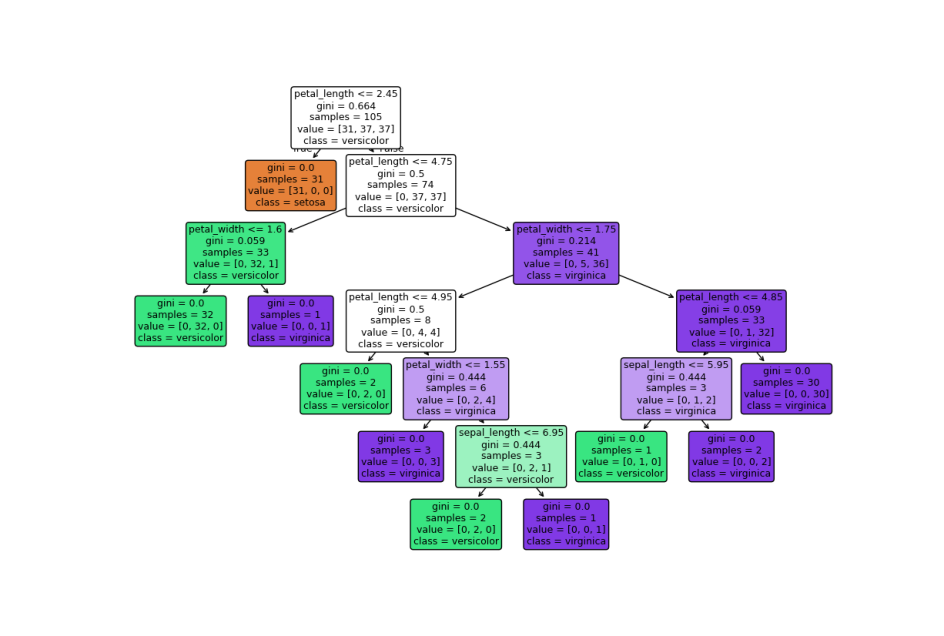

In [17]:
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("iris_decision_tree.png"))
plt.axis('off')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [19]:
rf_clf = RandomForestClassifier(n_estimators=5, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [20]:
rf_y_pred = rf_clf.predict(X_test)

In [21]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [22]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
gb_y_pred = gb_clf.predict(X_test)

In [24]:
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [25]:
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


In [26]:
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=2, max_features=3)  # Limited depth for the second tree
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=3, min_samples_leaf=2,
                       random_state=42)

In [27]:
tree1_y_pred = tree1.predict(X_test)
tree2_y_pred = tree2.predict(X_test)

In [28]:
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [29]:
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [30]:
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Decision Tree 2 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [31]:
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



Comparison of Models:
Decision Tree 1 Accuracy: 1.00
Decision Tree 2 Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
